In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge('A','B',weight=13,relation='friend')
G.add_edge('B','C',weight=9,relation='family')
G.add_edge('B','D',weight=7,relation='friend')
G.add_edge('E','B',weight=10,relation='friend')
G.add_edge('E','A',weight=1,relation='enemy')
G.add_edge('F','B',weight=13,relation='family')

In [3]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 13, 'relation': 'friend'}), ('A', 'E', {'weight': 1, 'relation': 'enemy'}), ('B', 'C', {'weight': 9, 'relation': 'family'}), ('B', 'D', {'weight': 7, 'relation': 'friend'}), ('B', 'E', {'weight': 10, 'relation': 'friend'}), ('B', 'F', {'weight': 13, 'relation': 'family'})])

In [4]:
G.add_node('A',role='Trader')
G.add_node('B',role='Analyst')
G.add_node('C',role='Manager')

In [5]:
G.nodes(data=True)

NodeDataView({'A': {'role': 'Trader'}, 'B': {'role': 'Analyst'}, 'C': {'role': 'Manager'}, 'D': {}, 'E': {}, 'F': {}})

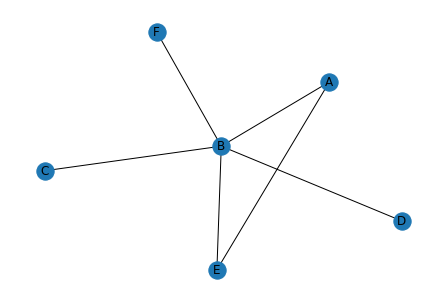

In [6]:
nx.draw(G, with_labels=True)

In [7]:
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',4),('E',1),('A',2),('E',2)])
bipartite.is_bipartite(B)

True

[('A', 1), ('A', 2), ('B', 1), ('C', 1), ('C', 3), ('D', 4), ('E', 1), ('E', 2)]


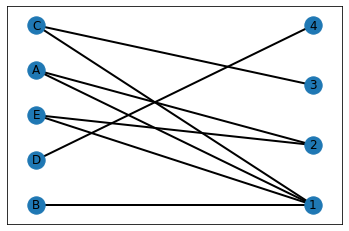

In [8]:
edges = B.edges()
nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, ['A','B','C','D','E']), 
    width = 2)
print(edges)

In [9]:
import csv
from operator import itemgetter
from networkx.algorithms import community 

#This part of networkx, for community detection, needs to be imported separately.

In [50]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]
    
node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data
    
node_names

['Joseph_Wyeth;religious_writer;male;1663;1731;10013191',
 'Alexander_Skene_of_Newtyle;local_politician_and_author;male;1621;1694;10011149',
 'James_Logan;colonial_official_and_scholar;male;1674;1751;10007567',
 'Dorcas_Erbery;Quaker_preacher;female;1656;1659;10003983',
 'Lilias_Skene;Quaker_preacher_and_poet;male;1626;1697;10011152',
 'William_Mucklow;religious_writer;male;1630;1713;10008595',
 'Thomas_Salthouse;Quaker_preacher_and_writer;male;1630;1691;10010643',
 'William_Dewsbury;Quaker_activist;male;1621;1688;10003478',
 'John_Audland;Quaker_preacher;male;1630;1664;10000411',
 'Richard_Claridge;Quaker_minister_and_schoolmaster;male;1649;1723;10002469',
 'William_Bradford;printer;male;1663;1752;10001445',
 'Fettiplace_Bellers;philosophical_writer_and_playwright;male;1687;1750;10000933',
 'John_Bellers;political_economist_and_cloth_merchant;male;1654;1725;10000934',
 'Isabel_Yeamans;Quaker_preacher;female;1637;1704;10013226',
 'George_Fox_the_younger;religious_writer;male;1551;1661;

In [43]:
""" PB ICI IL FAUDRAIT SEPARER LES ARRETES EN COUPLE DE DONNEES ET LES SOMMETS EN 1 SEULE DONNEE    --  OR ICI PB DE ; ET (,) """

' PB ICI IL FAUDRAIT SEPARER LES ARRETES EN COUPLE DE DONNEES ET LES SOMMETS EN 1 SEULE DONNEE    --  OR ICI PB DE ; ET (,)'

In [45]:
edges

[('George_Keith;Robert_Barclay',),
 ('George_Keith;Benjamin_Furly',),
 ('George_Keith;Anne_Conway_Viscountess_Conway_and_Killultagh',),
 ('George_Keith;Franciscus_Mercurius_van_Helmont',),
 ('George_Keith;William_Penn',),
 ('George_Keith;George_Fox',),
 ('George_Keith;George_Whitehead',),
 ('George_Keith;William_Bradford',),
 ('James_Parnel;Benjamin_Furly',),
 ('James_Parnel;Stephen_Crisp',),
 ('Peter_Collinson;John_Bartram',),
 ('Peter_Collinson;James_Logan',),
 ('Joseph_Wyeth;Thomas_Ellwood',),
 ('Alexander_Skene_of_Newtyle;Lilias_Skene',),
 ('Dorcas_Erbery;James_Nayler',),
 ('William_Mucklow;George_Fox',),
 ('Franciscus_Mercurius_van_Helmont;Benjamin_Furly',),
 ('William_Dewsbury;Edward_Burrough',),
 ('William_Dewsbury;George_Fox',),
 ('William_Dewsbury;John_Crook',),
 ('John_Audland;John_Camm',),
 ('John_Audland;Francis_Howgill',),
 ('John_Audland;Edward_Pyott',),
 ('John_Audland;Charles_Marshall',),
 ('John_Audland;George_Fox',),
 ('John_Audland;Anne_Camm',),
 ('Francis_Howgill;Ma

In [51]:
import csv



""" création de la liste de sommets !!! """
""" transforme le fichier csv avec ; sur 6 colonnes en liste de liste de 6 données"""

fichier_nodelist =  open('quakers_nodelist.csv', 'r')    # ouverture du fichier
lignes1 = fichier_nodelist.readlines()                    # lecture des lignes ( contiennent 6 ; séparateurs car csv)=> créé une liste des lignes avec ;
table1 = []
for i in lignes1:                         # on ne pas pas démarrer apres la 1ere ligne, il faut tout prendre ici
    ligne_node = i.rstrip("\n").split(';')    # split() découpe la chaine de caractères en une liste de chaine de caractères 
                                         # si valeurs numériques, faire peut être un transtypage avec les fct° int() ou float()
    table1.append(ligne_node)                  # ajoute à la liste de lignes créées ( avec , au lieu de ; comme séparateur des colonnes)

fichier_nodelist.close()                          # fermeture du fichier

     # création d'une liste de nom uniquement de la table des noms+5infos ( élimine 5 colonne et ne prend que la 1ere )
liste_noms = []
for i in range(120):                   #♣ 120 noms vus, pas réussi à le faire suivant la table
    liste_noms.append(table1[i][0])

# élimination de la 1ere ligne d'entête inutile et transformation de la liste en tuple
del(liste_noms[0])      # del() efface un élément d'une liste
tuple_sommet = tuple(liste_noms)  # convertir la liste en tuple
    
""" now il faut extraire 2 colonnes pour les tuples d'arêtes d'un autre fichier csv !!! """

fichier_edgelist =  open('quakers_edgelist.csv', 'r')    # ouverture du fichier des arêtes ici les colonnes 1 et 2 où enlever les ;
lignes2 = fichier_edgelist.readlines()                    # lecture des lignes ( contiennent 1 ; séparateurs car csv)
table2 = []
for i in lignes2:                         # on ne pas pas démarrer apres la 1ere ligne, il faut tout prendre ici
    ligne_edge = i.rstrip("\n").split(';')    # split() découpe la chaine de caractères en une liste de chaine de caractères 
                                          # si valeurs numériques, faire peut être un transtypage avec les fct° int() ou float()
    table2.append(ligne_edge)                  # ajoute à la liste

fichier_edgelist.close()                          # fermeture du fichier

      # création d'une liste de tuples
liste_source_target = []
for i in range(175):                   
    liste_source_target.append((table2[i][0],table2[i][1]))  
    
# élimination de la 1ere ligne d'entête inutile et transformation de la liste en liste de tuples
del(liste_source_target[0])      # del() efface le 1er élément d'une liste

node_names = liste_noms
edges = liste_source_target

In [52]:
print("number_of__node_names =",len(node_names))
print("number_of_edges =",len(edges))

number_of__node_names = 119
number_of_edges = 174


In [53]:
G = nx.Graph()

In [54]:
G.add_nodes_from(node_names)

In [55]:
G.add_edges_from(edges)

In [56]:
print(nx.info(G))

Graph with 119 nodes and 174 edges


C:\Users\UserPC\AppData\Local\Temp\ipykernel_10652\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [57]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [63]:
node[0]  # PB EXISTE POUR 0 MAIS PAS ENSUITE

'Joseph_Wyeth;religious_writer;male;1663;1731;10013191'

In [58]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

IndexError: list index out of range